In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

import math
import os

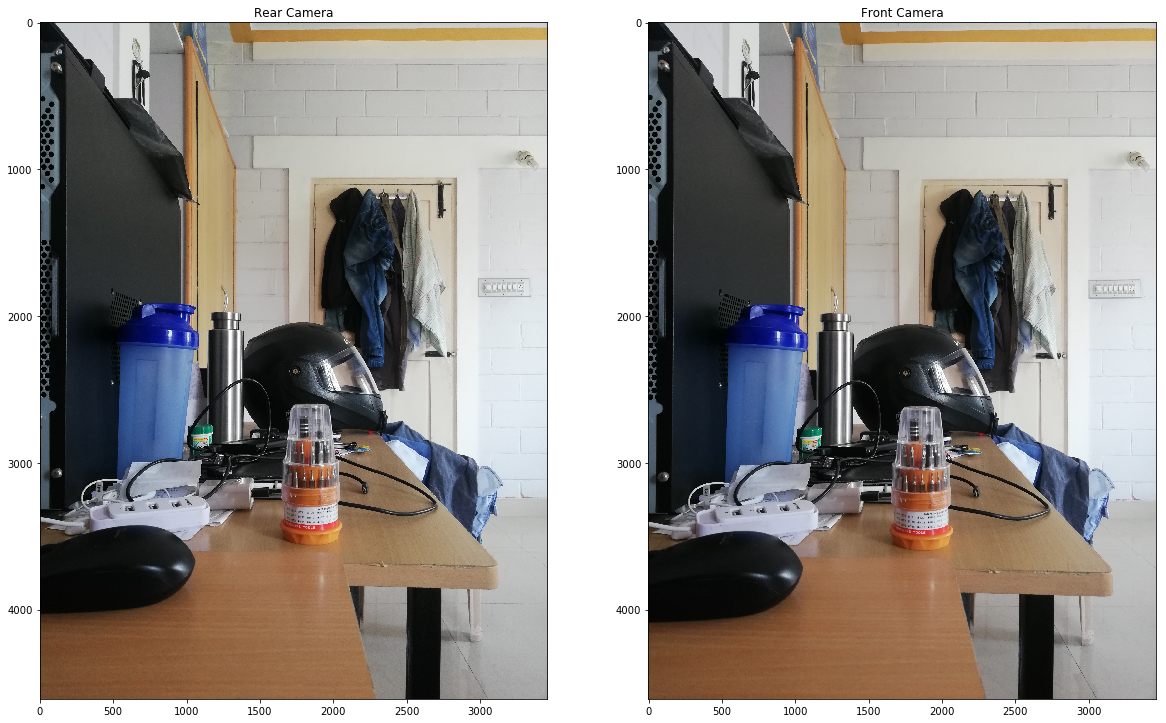

In [2]:
img_back = mpimg.imread('images/set1/img_back.jpg')
img_front = mpimg.imread('images/set1/img_front.jpg')

fig1 = plt.figure(figsize=(20, 20))
fig1.add_subplot(1, 2, 1)
plt.title("Rear Camera")
plt.imshow(img_back)

fig1.add_subplot(1, 2, 2)
plt.title("Front Camera")
plt.imshow(img_front)
plt.show()

In [3]:
# print image information
print("Rear camera image dimensions:",img_back.shape)
print("Front camera image dimensions:", img_front.shape)

Rear camera image dimensions: (4608, 3456, 3)
Front camera image dimensions: (4608, 3456, 3)


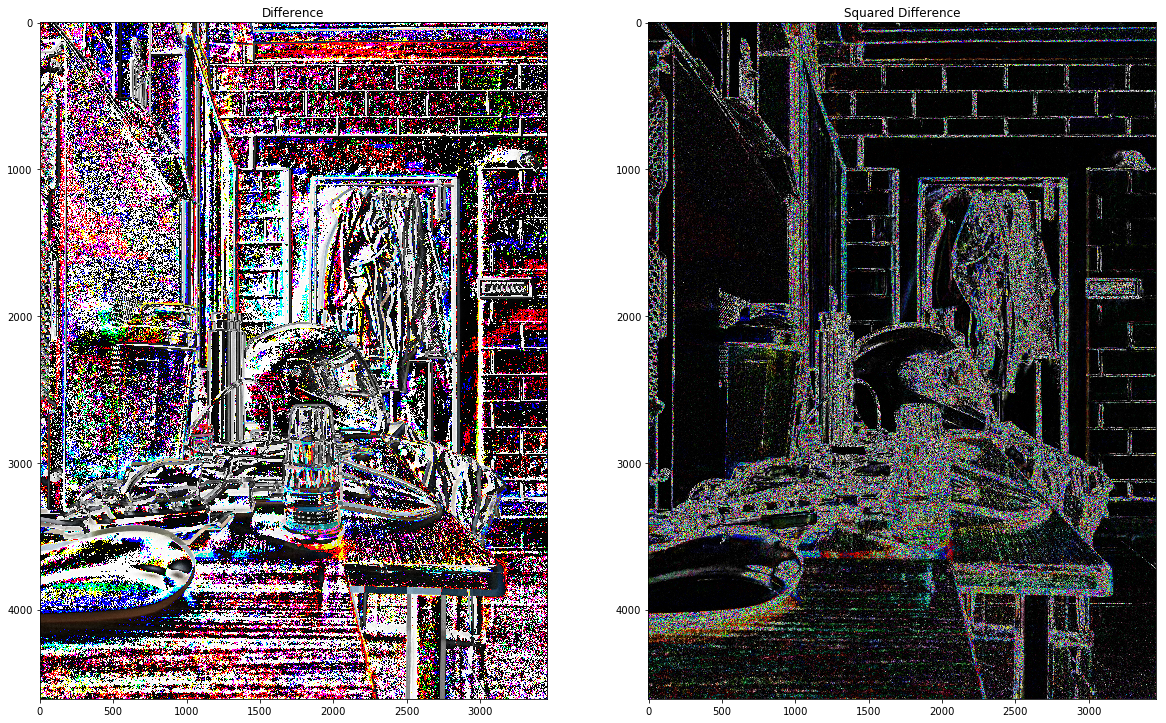

Thick outlines in difference image show the shift and zoom.


In [4]:
# Have a look at squared differences between the two images
img_diff = (img_back -img_front)
img_sq_diff = (img_back -img_front)**2

fig1 = plt.figure(figsize=(20, 20))
fig1.add_subplot(1, 2, 1)
plt.title("Difference")
plt.imshow(img_diff)

fig1.add_subplot(1, 2, 2)
plt.title("Squared Difference")
plt.imshow(img_sq_diff)
plt.show()
print("Thick outlines in difference image show the shift and zoom.")

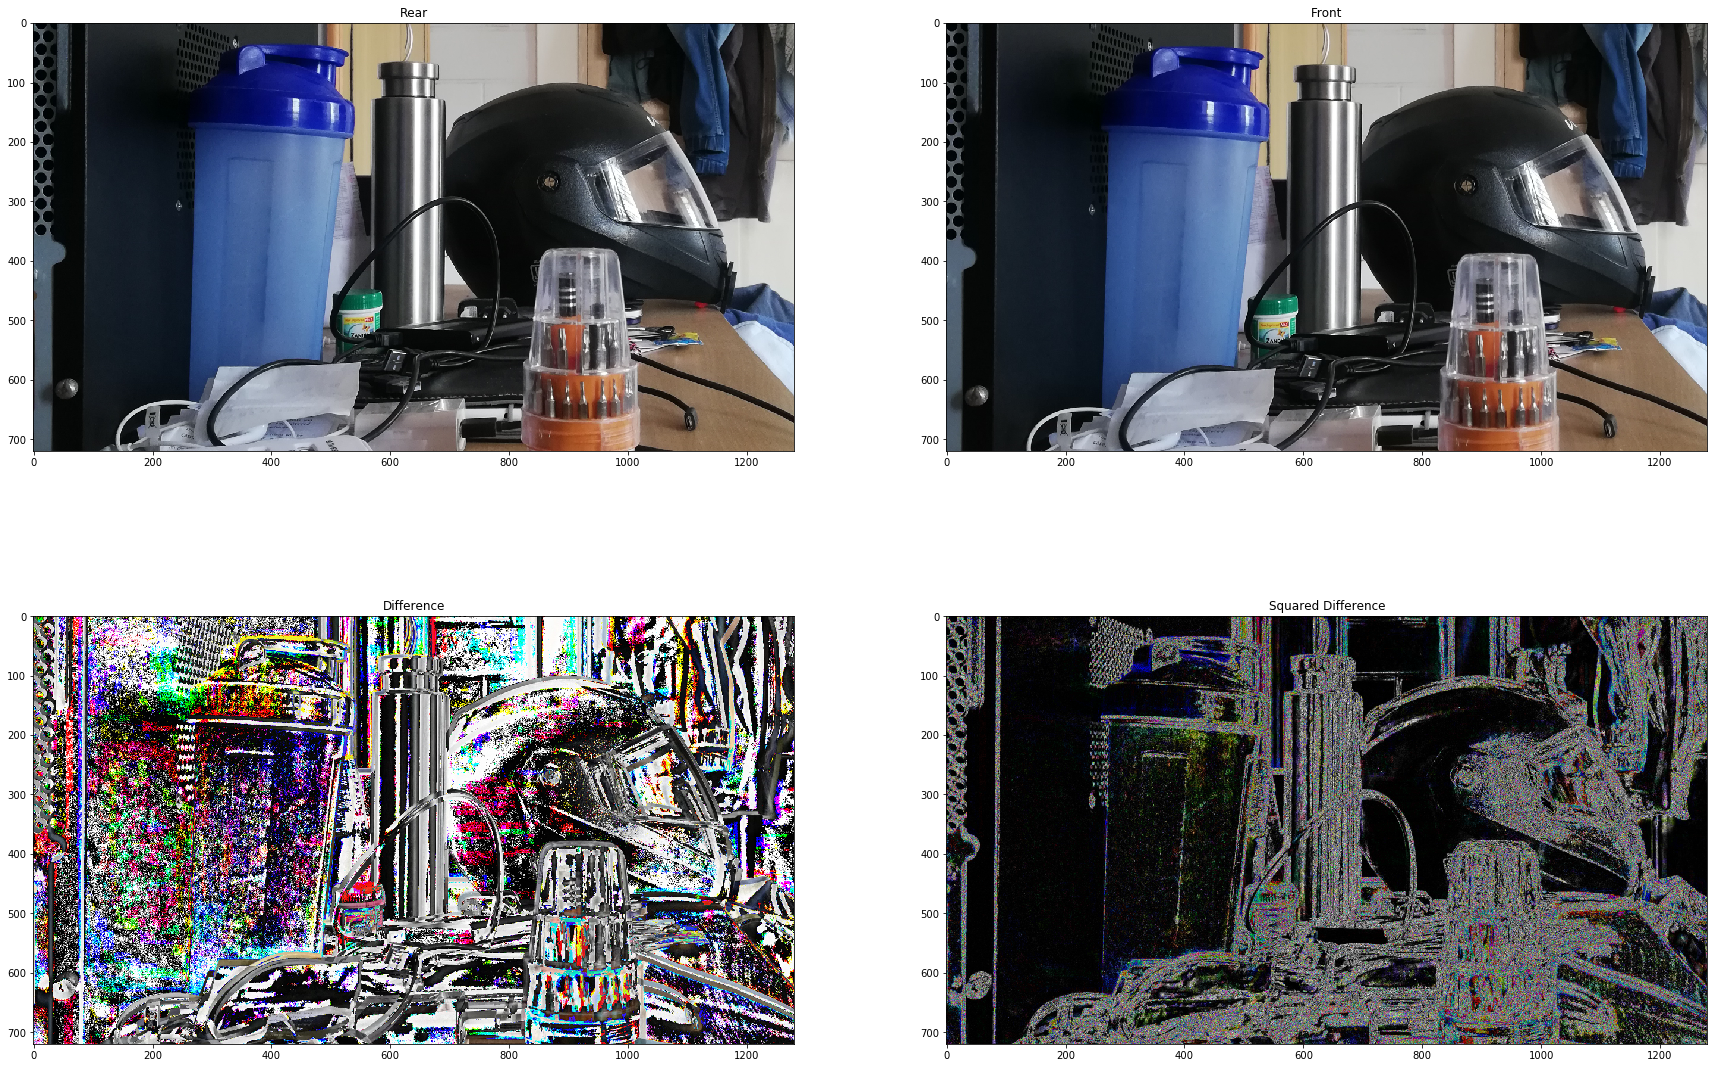

In [5]:
# Create a clip of each image to test with
clp_img_back = img_back[1840:3280,:2560,:]
clp_img_front = img_front[1840:3280,:2560,:]
clp_img_diff = img_diff[1840:3280,:2560,:]
clp_img_sqdf = img_sq_diff[1840:3280,:2560,:]

clp_img_back = cv2.resize(clp_img_back, (1280, 720))
clp_img_front = cv2.resize(clp_img_front, (1280, 720))
clp_img_diff = cv2.resize(clp_img_diff, (1280, 720))
clp_img_sqdf = cv2.resize(clp_img_sqdf, (1280, 720))


fig1 = plt.figure(figsize=(30, 20))
fig1.add_subplot(2, 2, 1)
plt.title("Rear")
plt.imshow(clp_img_back)

fig1.add_subplot(2, 2, 2)
plt.title("Front")
plt.imshow(clp_img_front)

fig1.add_subplot(2, 2, 3)
plt.title("Difference")
plt.imshow(clp_img_diff)

fig1.add_subplot(2, 2, 4)
plt.title("Squared Difference")
plt.imshow(clp_img_sqdf)


In [24]:
# now we have two 720p images to compare
img_height, img_width = clp_img_back.shape[:2]
print("width:", img_width, "height:", img_height)

# size of square filters to be used for matching
filter_size = 32
max_deviation = 24
stride = 4

# assuming cameras to be placed just in front of other and one in front to be invisible ;)
#distance between the camera_far and camera_near in meters
camera_d = 0.01

width: 1280 height: 720


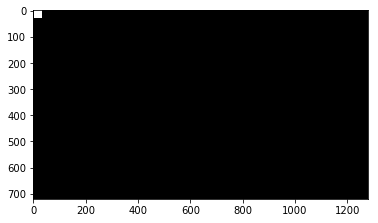

In [25]:
match_mask = np.zeros_like(clp_img_front[:,:,0])
# for each patch of filter_size in rear image
for fw in range(img_width - filter_size + 1):
    for fh in range(img_height - filter_size + 1):
        front_patch = clp_img_front[fh:fh+filter_size, fw:fw+filter_size, :]
        # minimum sum of squared differences
        min_sosd = 9999999999
        # starting point
        bw = fw - max_deviation
        bh = fh - max_deviation
        if fw - max_deviation < 0:
            bw = 0
        if fh - max_deviation < 0:
            bh = 0
        tmp_mask = np.zeros_like(match_mask[:filter_size, :filter_size])
        msk_wh = None
        # for each patch in rear image get min_sosd
        for rw in range(bw, fw + max_deviation + 1, stride):
            for rh in range(bh, fh + max_deviation + 1, stride):
                tmp_diff = (clp_img_back[rw:rw+filter_size, rh:rh+filter_size, :] - front_patch)**2
                sosd = np.sum(tmp_diff)
                if sosd < min_sosd:
                    min_sosd = sosd
                    msk_wh = (rw, rh)
        match_mask[msk_wh[0]:msk_wh[0]+filter_size, msk_wh[1]:msk_wh[1]+filter_size] = 1
        break
    break

plt.imshow(match_mask, cmap="gray")
plt.show()